<h2>Unsupervised Learning</h2>

- Clustering : Group similar instances together into clusters. This is used for data analysis, customer segmentation, recommender systems, search engines etc. 

- Anomaly detection: Learn what normal data looks like and use this to detect abnormal instances

- Density estimation: this is used to entimate the probability density function of the random process that generated the dataset. Commonly used for anomaly detection. Instances in low-density regions are likely to be anomalies. 

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
iris = datasets.load_iris()

In [10]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
x = iris["data"]
y = iris["target"]

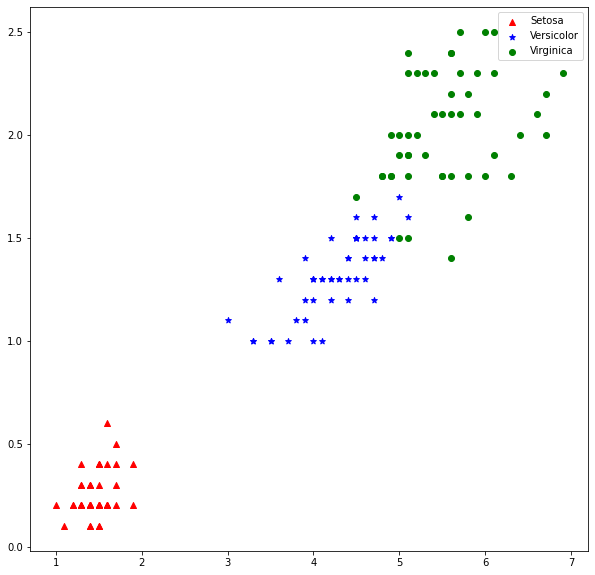

In [22]:
fig,ax = plt.subplots(1,1,figsize = (10,10))

#Setosa
ax.scatter(x[:,2][y == 0],x[:,3][y == 0], color = 'r', marker = '^', label = 'Setosa')
#Versicolor
ax.scatter(x[:,2][y == 1],x[:,3][y == 1], color = 'b', marker = '*', label = 'Versicolor')
#Viriginica
ax.scatter(x[:,2][y == 2],x[:,3][y == 2], color = 'g', marker = 'o', label = 'Virginica')
ax.legend()

In [23]:
from sklearn.datasets import make_blobs

In [24]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [25]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [27]:
y

array([4, 2, 0, ..., 3, 0, 2])

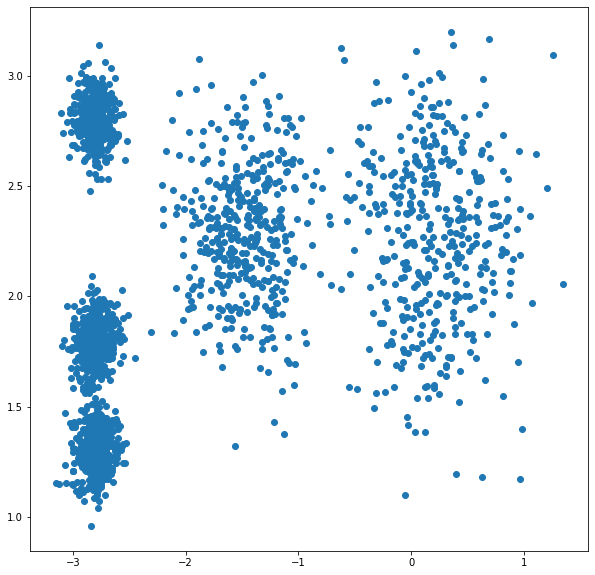

In [29]:
fig,ax_blobs = plt.subplots(1,1,figsize = (10,10))
ax_blobs.scatter(X[:,0],X[:,1])

<h2> Hard Clustering </h2>

In [30]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

In [31]:
y_pred

array([0, 3, 4, ..., 2, 4, 3])

In [32]:
kmeans.labels_

array([0, 3, 4, ..., 2, 4, 3])

In [33]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336]])

In [63]:
def plot_points(X,ax):
    ax.scatter(X[:,0],X[:,1])
def plot_cent(centroids,ax):
    ax.scatter(centroids[:,0],centroids[:,1], marker = 'o', s = 35, color = 'w')
def plot_decision_boundaries(model, X,ax,plot_centroids = True):
    x1_min = np.min(X[:,0]) - 0.1
    x1_max = np.max(X[:,0]) + 0.1
    x2_min = np.min(X[:,1]) - 0.1
    x2_max = np.max(X[:,1]) + 0.1
    x1_range = np.arange(x1_min,x1_max,step = 0.01)
    x2_range = np.arange(x2_min,x2_max,step = 0.01)
    x1mesh,x2mesh = np.meshgrid(x1_range,x2_range)
    ypred = model.predict(np.c_[x1mesh.reshape(-1),x2mesh.reshape(-1)]).reshape(x1mesh.shape)
    ax.contourf(ypred, extent=(x1_min, x1_max, x2_min, x2_max),
               cmap="Pastel2")
    ax.contour(ypred,extent=(x1_min, x1_max, x2_min, x2_max),
               colors = 'k')
    plot_points(X,ax)
    plot_cent(kmeans.cluster_centers_,ax)
    #return x1_min, x1_max,x2_min,x2_max  


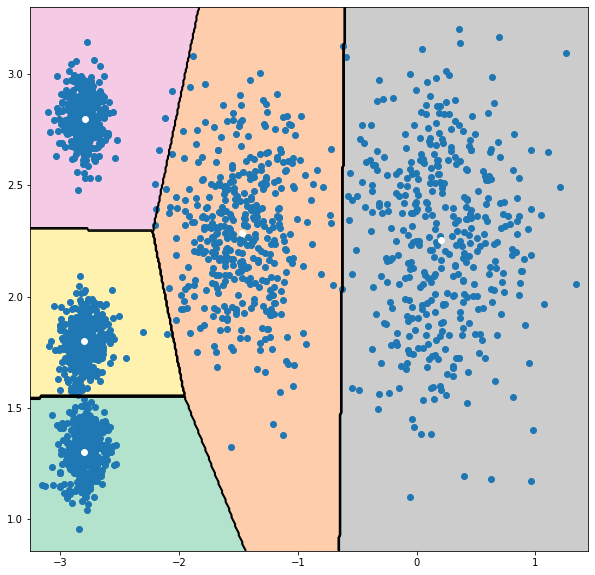

In [64]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
plot_decision_boundaries(kmeans, X, ax)

In [65]:
a

-3.253436265073339

In [66]:
b

1.4444268762891035

In [67]:
np.arange(a,b,step = 100)

array([-3.25343627])

<h3> Centroid Initialization Methods </h3>

To select the centroids which would result in better models, the following can be done:

- Run a model and use the cluster_centroids_ as the centroids for the next model and train it
- Use the n_init parameter to run multiple models at the same time and keep the best model with the lowest kmeans.inertia_